In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep
import random

## Randomly generate the network structure and initial seed set

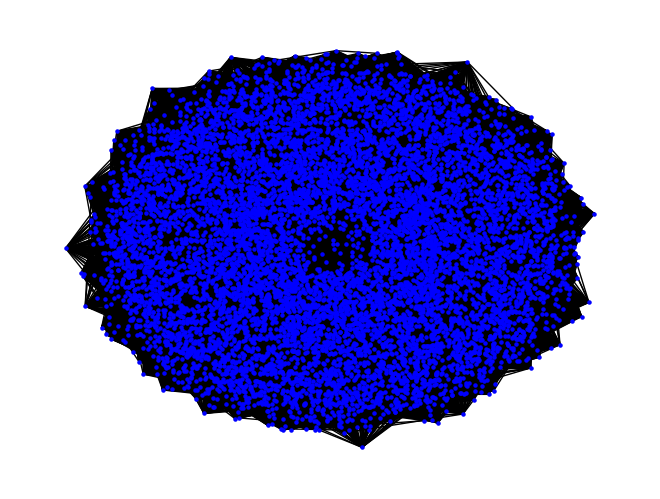

In [3]:
# Network topology
g = nx.erdos_renyi_graph(10000, 0.01)
pos = nx.spring_layout(g) 
nx.draw(g, pos, node_color='blue', node_size=5)

In [4]:
print("graph with type: ", type(g), ". And the", g)

graph with type:  <class 'networkx.classes.graph.Graph'> . And the Graph with 10000 nodes and 499088 edges


### Load IC mode and set the threshold 

In [5]:
# Model selection
model = ep.IndependentCascadesModel(g)

# Model Configuration
config = mc.Configuration()
#config.add_model_parameter('fraction_infected', 0.008)

# Setting the edge parameters
threshold = 0.01
for e in g.edges():
    config.add_edge_configuration("threshold", e, threshold)

### Randomly generate initial seed node

In [6]:
# Generate a random initial set of nodes
num_initial_nodes = 100  # Replace with the desired number of initial nodes
nodes_list = list(g.nodes())
initial_set = random.sample(nodes_list, num_initial_nodes)

print("Initial seed set randomy generated as:",initial_set)

config.add_model_initial_configuration("Infected", initial_set)
model.set_initial_status(config)

effected_node = []

Initial seed set randomy generated as: [887, 3617, 1905, 3946, 5477, 1105, 789, 7725, 167, 7882, 7257, 4461, 343, 6322, 8583, 289, 2936, 4730, 9615, 6394, 5187, 3098, 3891, 9867, 6975, 9225, 6071, 1774, 2754, 6900, 7289, 1721, 5321, 7069, 9780, 2939, 4253, 5019, 1230, 3118, 4228, 2278, 7297, 6848, 5645, 955, 315, 2732, 4053, 7714, 4194, 205, 1300, 210, 5542, 8428, 1590, 9261, 9375, 327, 5762, 7074, 6414, 1814, 9291, 245, 67, 7528, 4370, 346, 2381, 8719, 7762, 3607, 1026, 6687, 2414, 2260, 6290, 4564, 1998, 927, 8655, 5553, 4677, 3076, 1045, 5508, 7441, 9556, 1173, 6610, 5215, 3043, 3049, 9251, 1966, 4167, 5092, 2410]


---

## Spreading iteration: 

### Parameters for iterations

- **Iterations:** list contain each iteration

- **Iteration:** dictionary contain parameters
  - `iteration`: ID
  - `status`: dic with node state pair
  - `node_count`: count nodes in each state, 0 is susceptible, 1 is infected, 2 is incativation.
  - `status_delta`: Describes the changes in the three states. Negitave number refers to decrease, positive refers to increase.
---

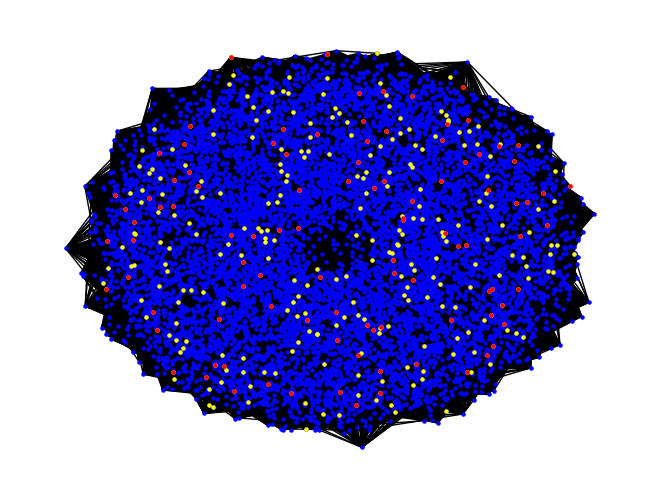

-----------------------------------Previous Status--------------------------------------------
iteration 6
There is the changing info during iteration  6 : {0: -59, 1: 2, 2: 57}
There is the result after iteration  6 : {0: 9466, 1: 59, 2: 475}
-------------------Continue...----------------------
iteration 7
There is the changing info during iteration  7 : {0: -61, 1: 2, 2: 59}
There is the result after iteration  7 : {0: 9405, 1: 61, 2: 534}
-------------------Continue...----------------------
iteration 8
There is the changing info during iteration  8 : {0: -61, 1: 0, 2: 61}
There is the result after iteration  8 : {0: 9344, 1: 61, 2: 595}
-------------------Continue...----------------------
iteration 9
There is the changing info during iteration  9 : {0: -44, 1: -17, 2: 61}
There is the result after iteration  9 : {0: 9300, 1: 44, 2: 656}
-------------------Continue...----------------------
                                                                            
------------------

In [10]:
iterations = model.iteration_bunch(5)  # Replace '5' with the desired number of iterations
#print(type(iterations))

# Visualize the spreading process
for i, iteration in enumerate(iterations):
    if i == 0:
        #print("Previous Status:")
        #for node,state in iteration["status"].items():
            #if state == 0:
                #print("The node {} is Susceptible".format(node))
            #elif state == 1:
                #print("The node {} is Infected".format(node))
            #elif state == 2:
                #print("The node {} is inactivation".format(node)) 
        #nx.draw(g, with_labels=False, node_size=5)
        if len(effected_node) == 0:
            nx.draw(g, pos, node_color='blue', node_size=5)
            nx.draw_networkx_nodes(g, pos, nodelist=initial_set, node_color='red', node_size=5)
            plt.show()
            print("---------------------Initial seed node activated, spreading begin!----------------------------")
        else:
            nx.draw(g, pos, node_color='blue', cmap=plt.cm.Reds, node_size=5)
            nx.draw_networkx_nodes(g, pos, nodelist=effected_node, node_color='yellow', node_size=5)
            nx.draw_networkx_nodes(g, pos, nodelist=initial_set, node_color='red', node_size=5)
            plt.show()
            print("-----------------------------------Previous Status--------------------------------------------") 
    else:
        print("iteration", iteration['iteration'])
        #for node,state in iteration["status"].items():
            #if state == 1:
                #print("The node {} is Infected".format(node))
            #elif state == 2:
                #print("The node {} is inactivation".format(node))
        print("There is the changing info during iteration ", iteration['iteration'],":",iteration['status_delta'])
        print("There is the result after iteration ", iteration['iteration'],":",iteration['node_count'])
        print("-------------------Continue...----------------------")
        activate_node = []
        inactivated_node = []
        for node ,statu in iteration["status"].items():
            if statu == 1:
                activate_node.append(node)
            elif statu == 2:
                inactivated_node.append(node)
                effected_node.append(node)
        #pos = nx.spring_layout(g)  # Replace with your preferred layout algorithm
        #nx.draw(g, pos, node_color='blue', cmap=plt.cm.Reds, node_size=5)  # Start with blue nodes
        #nx.draw_networkx_nodes(g, pos, nodelist=activate_node, node_color='red', node_size=5)

        #print("activate node in iteration ", iteration["iteration"], "is: ", activate_node)
        #print("inactivate node in iteration ", iteration["iteration"], "is: ", inactivated_node)
        #plt.show()
print("                                                                            ")
print("-----------------------------------iteration pause.--------------------------------------------")
print(len(effected_node), " nodes effected from lastest iteration:", effected_node)

there is still  44 activate nodes which is [72, 441, 972, 1277, 1315, 1564, 1920, 2023, 2075, 2266, 2279, 2321, 2343, 2994, 3022, 3628, 3633, 3698, 3760, 3848, 4234, 4668, 5467, 5556, 5574, 5609, 5960, 6126, 6180, 6856, 7278, 7893, 8066, 8146, 8675, 9151, 9210, 9386, 9467, 9499, 9691, 9710, 9760, 9800]


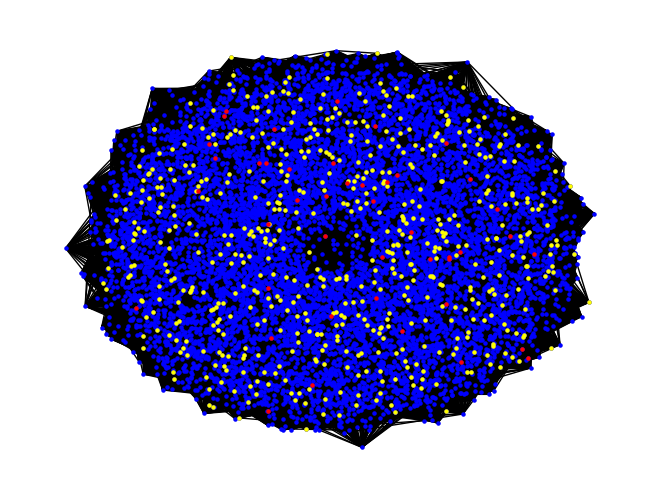

In [11]:
print("there is still ", len(activate_node), "activate nodes which is", activate_node)
nx.draw(g, pos, node_color='blue', node_size=5)
nx.draw_networkx_nodes(g, pos, nodelist=effected_node, node_color='yellow', node_size=5)
nx.draw_networkx_nodes(g, pos, nodelist=activate_node, node_color='red', node_size=5)
plt.show()

## Parallel Spreading

In [9]:
import multiprocessing as mp

In [2]:
def spread_simulation(graph, initial_node):
    

    return spreading_result

def run_spreading_simulation(graph, initial_node):
    # Run a single spreading simulation for a given source node
    result = spread_simulation(graph, initial_node)
    return result

def parallel_spreading_simulation(graph, initial_nodes, num_processes):
    # Create a multiprocessing Pool with the desired number of processes
    pool = mp.Pool(num_processes)

    # Generate the arguments for each spreading simulation
    arguments = [(graph, node) for node in initial_nodes]

    # Run spreading simulations in parallel
    results = pool.starmap(run_spreading_simulation, arguments)

    # Close the pool to free resources
    pool.close()
    pool.join()

    return results

## Use SNAP generate network structure

In [22]:
import snap

In [4]:
G1 = snap.GenRndGnm(snap.PNGraph, 10, 60)
#Ran = snap.TRnd(1,0)
n = 100  # number of nodes
k = 4  # each node is connected to k nearest neighbors
p = 0.3  # probability of rewiring each edge
# snap_graph = snap.GenSmallWorld(n, k, p, Ran)
# print(snap_graph)

AttributeError: module 'snap' has no attribute 'GenRndGnm'